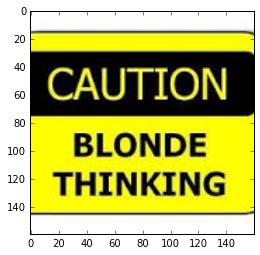

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline

imshow(np.asarray(Image.open('BlondeThinking.jpg', 'r')))

# Are Blondes Really Dumb?

El siguiente análisis se basa en un estudio sobre la relación entre el coeficiente de inteligencia y características físicas de una persona realizado por la universidad de Ohio y públicado en Economics Bulletin en un artículo titulado "Are Blondes Really Dumb?".

El artìculo se puede encontrar aqui:
https://www.researchgate.net/publication/305222263_Are_Blondes_Really_Dumb

El estudio se basa en los datos recogidos en los Estados Unidos por el instituto nacional estadístico  de trabajo en una encuesta de larga duración encargada por el gobierno estadounidense. En la encuesta (llamada NLSY79) han tomado parte mas de 10 mil personas elegidas aleatoriamente. Las mismas personas han sido encuestadas durante varios años sobre distintos temas desde el año 1979 hasta 2016.

##### Voy a comprobar los resultados del estudio sobre IQ de las mujeres rubias. También intentaré averiguar si el hecho de ser muejr rubia suele perjudicar en ciertos ámbitos de la vida, qué factores se relacionan con el nivel del coeficiente IQ y con el éxito en la vida laboral y personal. 

Los datos recogidos en el estudio están disponibles publicamente en:
https://www.nlsinfo.org/investigator/pages/search.jsp?s=NLS79#

Para mi análisis he elegido algunas variables interesantes.

#### Preparo los datos

In [3]:
import pandas as pd
import numpy as np
import csv

datos = pd.read_csv('defaultabs.csv', sep = ',')

In [4]:
datos.head(3)

,CASEID,SAMPLE_SEX,SAMPLE_RACE,AGEATINT,HEALTH-HAIR,HEALTH-EYES,H40-CHRC-15,H50SLP-1,H50SLP-2,Q1-3_A~M,...,Q11-GENHLTH_7C_1,Q12-6,Q13-5_SR000002,Q13-9_UAB_B,Q13-9_UAB_C,RISK_4,HRP5,POVSTATUS2011,MARSTAT-KEY,HGC
0,1,2,3,20,5,5,4,4,4,9,...,5,5,5,5,5,5,5,5,5,5
1,2,2,3,20,3,7,0,4,3,1,...,0,4,4,4,4,4,4,0,1,12
2,3,2,3,17,2,2,0,5,7,8,...,0,5,4,4,4,8,4,0,1,12


In [5]:
datos.shape[:] # el datos set tiene 12.686 observaciones y 44 variables

(12686, 44)

In [6]:
# En un fichero separado tengo:
#la descripción de las variables,la fecha en la que se ha tomado la información y de los valores que pueden tomar.
des = pd.read_csv('DescripcionVariables.csv', sep = ',') 

In [7]:
des[['VARIABLE TITLE','VARIABLE DESCRIPTION','DEFAULT VALUE','YEAR']].head()

,VARIABLE TITLE,VARIABLE DESCRIPTION,DEFAULT VALUE,YEAR
0,CASEID,IDENTIFICATION CODE,NaN,1979
1,SAMPLE_SEX,SEX OF R,"1 ""MALE"" 2 ""FEMALE""",1979
2,SAMPLE_RACE,R'S RACIAL/ETHNIC COHORT FROM SCREENER,"1 ""HISPANIC"" 2 ""BLACK"" 3 ""NON-BLACK, NON-HI...",78SCRN
3,AGEATINT,AGE OF R AT INTERVIEW DATE,"14 ""14"" 15 ""15"" 16 ""16"" 17 ""17"" 18 ""18"" ...",1979
4,HEALTH-HAIR,COLOR OF HAIR,"1 ""LIGHT BLOND"" 2 ""BLOND"" 3 ""LIGHT BROWN"" ...",1985


Como los datos vienen codificados y la nomenclatura de los campos en poco cómoda de usar, recodifico el data frame renombrando discretizando algunas variables.

In [8]:
# Entre las variables categóricas voy a comprobar que categorías traen 
import numpy as np
print 'SAMPLE_SEX', np.unique(datos[['SAMPLE_SEX']])
print 'SAMPLE_RACE',np.unique(datos[['SAMPLE_RACE']])
print 'HEALTH-HAIR',np.unique(datos[['HEALTH-HAIR']])
print 'HEALTH-EYES',np.unique(datos[['HEALTH-EYES']])
print 'H40-CHRC-15',np.unique(datos[['H40-CHRC-15']])
print 'FAM-2A',np.unique(datos[['FAM-2A']])
print 'FAM-13A',np.unique(datos[['FAM-13A']])
print 'FAM-13B',np.unique(datos[['FAM-13B']])
print 'FAM-13C',np.unique(datos[['FAM-13C']])
print 'TRN-7A_1',np.unique(datos[['TRN-7A_1']])
print 'EXP-7',np.unique(datos[['EXP-7']])
print 'POVSTATUS78',np.unique(datos[['POVSTATUS78']])
print 'EXP-11D',np.unique(datos[['EXP-11D']])
print 'DRUG-22',np.unique(datos[['DRUG-22']])
print 'DRUG-26',np.unique(datos[['DRUG-26']])
print 'CRES-1',np.unique(datos[['CRES-1']])
print 'Q11-9E',np.unique(datos[['Q11-9E']])
print 'Q11-9F',np.unique(datos[['Q11-9F']])
print 'Q11-GENHLTH_7A',np.unique(datos[['Q11-GENHLTH_7A']])
print 'Q11-GENHLTH_7C_1',np.unique(datos[['Q11-GENHLTH_7C_1']])
print 'Q13-9_UAB_B',np.unique(datos[['Q13-9_UAB_B']])
print 'Q13-9_UAB_C',np.unique(datos[['Q13-9_UAB_C']])
print 'RISK_4',np.unique(datos[['RISK_4']])
print 'POVSTATUS2011',np.unique(datos[['POVSTATUS2011']])
print 'MARSTAT-KEY',np.unique(datos[['MARSTAT-KEY']])
print 'HGC',np.unique(datos[['HGC']])

SAMPLE_SEX [1 2]
SAMPLE_RACE [1 2 3]
HEALTH-HAIR [1 2 3 4 5 6 7]
HEALTH-EYES [1 2 3 4 5 6 7 8 9]
H40-CHRC-15 [0 1 2 4]
FAM-2A [1 2 3]
FAM-13A [0 1 2 3]
FAM-13B [0 1 2 3]
FAM-13C [0 1 2 3]
TRN-7A_1 [1 2 3 4 5 6 7]
EXP-7 [0 1 2 3 4]
POVSTATUS78 [0 1 3]
EXP-11D [0 1 2 3 5]
DRUG-22 [0 1 3 5]
DRUG-26 [0 1 3 5]
CRES-1 [0 1 5]
Q11-9E [1 2 3 4 5]
Q11-9F [1 2 3 4 5]
Q11-GENHLTH_7A [0 1 2 3 4 5]
Q11-GENHLTH_7C_1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 20 71]
Q13-9_UAB_B [1 4 5]
Q13-9_UAB_C [1 4 5]
RISK_4 [ 0  1  2  3  4  5  6  7  8  9 10]
POVSTATUS2011 [0 1 3 5]
MARSTAT-KEY [0 1 2 3 5 6]
HGC [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Discretización de las variables categóricas y cambio de algunos nombres. --> este es el momento de ir por el café, como son sentencias for tarda un rato.

In [9]:
datos.loc[:, 'sex'] = None #renombro los valores de la variable sex y la cambio a categórica
for row in datos.index:
    if   datos.loc[row, 'SAMPLE_SEX'] ==1:
         datos.loc[row, 'sex'] = 'male'
    else:
         datos.loc[row, 'sex'] = 'female'
            
# catecorizo la variable de raza
# me va a hecer falta para separar las mujeres blancas para evitar sezgo en el enálisis según color de pelo

datos.loc[:, 'race'] = None 
for row in datos.index:
    if   datos.loc[row, 'SAMPLE_RACE'] ==3:
         datos.loc[row, 'race'] = 'white'
    else:
         datos.loc[row, 'race'] = 'black/hispanic'
            
# agrupo el color de pelo en: rubio, castaño, negro, pelirojo y otros. Se trata de color natural.            
datos.loc[:, 'hair'] = None
for row in datos.index:
    if   datos.loc[row, 'HEALTH-HAIR'] in [1,2]:
         datos.loc[row, 'hair'] = 'blond'
    elif datos.loc[row, 'HEALTH-HAIR'] in [3,4]:
         datos.loc[row, 'hair'] = 'brown'
    elif datos.loc[row, 'HEALTH-HAIR']==5:
         datos.loc[row, 'hair'] = 'black'
    elif datos.loc[row, 'HEALTH-HAIR']==6:
         datos.loc[row, 'hair'] = 'red'
    else:
         datos.loc[row, 'hair'] = 'other'   
            
            
#agrupo el color de ojos y convierto la variable a categórica
datos.loc[:, 'eyes'] = None
for row in datos.index:
    if   datos.loc[row, 'HEALTH-EYES'] in [1,2,8]:
         datos.loc[row, 'eyes'] = 'blue/grey'
    elif datos.loc[row, 'HEALTH-EYES'] in [3,4,7]:
         datos.loc[row, 'eyes'] = 'brown'
    elif datos.loc[row, 'HEALTH-EYES']==6:
         datos.loc[row, 'eyes'] = 'green'
    elif datos.loc[row, 'HEALTH-HAIR']==5:
         datos.loc[row, 'eyes'] = 'black'
    else:
         datos.loc[row, 'eyes'] = 'other'  
            
# categorizo la variable que determina si alguien lleva gafas/lentillas.            
datos.loc[:, 'glasses'] = None
for row in datos.index:
    if   datos.loc[row, 'H40-CHRC-15'] == 1:
         datos.loc[row, 'glasses'] = 'yes'
    else:
         datos.loc[row, 'glasses'] = 'no'  

# categorizo la variable de procedencia            
datos.loc[:, 'birth-country'] = None
for row in datos.index:
    if   datos.loc[row, 'FAM-2A'] == 1:
         datos.loc[row, 'birth-country'] = 'US'
    else:
         datos.loc[row, 'birth-country'] = 'other' 
            
# esta variable determina si alguien tuvo acceso a revistas en su casa a los 14 años            
datos.loc[:, 'read-magazines'] = None
for row in datos.index:
    if   datos.loc[row, 'FAM-13A'] == 1:
         datos.loc[row, 'read-magazines'] = 'yes'
    else:
         datos.loc[row, 'read-magazines'] = 'no' 
            
# esta variable determina si alguien tuvo acceso a periódicos en su casa a los 14 años
datos.loc[:, 'read-newspapers'] = None
for row in datos.index:
    if   datos.loc[row, 'FAM-13B'] == 1:
         datos.loc[row, 'read-newspapers'] = 'yes'
    else:
         datos.loc[row, 'read-newspapers'] = 'no' 

# esta variable determina si la persona tuvo una tarjera bibliotecaria a los 14 años            
datos.loc[:, 'library-card'] = None
for row in datos.index:
    if   datos.loc[row, 'FAM-13C'] == 1:
         datos.loc[row, 'library-card'] = 'yes'
    else:
         datos.loc[row, 'library-card'] = 'no' 
            
# agrupo la variable: 1a actividad en el verano 78 en: vacaciones, trabajo, buscar trabajo/cursos, nada/otros
datos.loc[:, '1st-summer-activ-78'] = None
for row in datos.index:
    if   datos.loc[row, 'TRN-7A_1'] == 1:
         datos.loc[row, '1st-summer-activ-78'] = 'vacation'
    elif datos.loc[row, 'TRN-7A_1'] in [3,4]:
         datos.loc[row, '1st-summer-activ-78'] = 'job'
    elif datos.loc[row, 'TRN-7A_1']in [5,6]:
         datos.loc[row, '1st-summer-activ-78'] = 'training/look for job'
    else:
         datos.loc[row, '1st-summer-activ-78'] = 'other/nothing'
            
# expectativa de matrimonio dentro de 5 años            
datos.loc[:, 'married-exp'] = None
for row in datos.index:
    if   datos.loc[row, 'EXP-7'] == 1:
         datos.loc[row, 'married-exp'] = 'yes'
    else:
         datos.loc[row, 'married-exp'] = 'no'
            
# discretizo la variable que detremina si una persona se encontraba en pobreza en el año 78            
datos.loc[:, 'poor78'] = None
for row in datos.index:
    if   datos.loc[row, 'POVSTATUS78'] == 1:
         datos.loc[row, 'poor78'] = 'yes'
    else:
         datos.loc[row, 'poor78'] = 'no'
       
    
# esta variable determina si la persona afirma que tiene problemas de encontrar buen trabajo por discriminación    
datos.loc[:, 'problem-getting-job'] = None
for row in datos.index:
    if   datos.loc[row, 'EXP-11D'] == 1:
         datos.loc[row, 'problem-getting-job'] = 'yes'
    else:
         datos.loc[row, 'problem-getting-job'] = 'no'
            
# esta variable determina si alguien ha tomado cocaina alguna vez            
datos.loc[:, 'drug-cocaine'] = None
for row in datos.index:
    if   datos.loc[row, 'DRUG-22'] == 1:
         datos.loc[row, 'drug-cocaine'] = 'yes'
    else:
         datos.loc[row, 'drug-cocaine'] = 'no'
            
# esta variable determina si alguien ha tomado otro tipo de droga alguna vez             
datos.loc[:, 'drug-other'] = None
for row in datos.index:
    if   datos.loc[row, 'DRUG-26'] == 1:
         datos.loc[row, 'drug-other'] = 'yes'
    else:
         datos.loc[row, 'drug-other'] = 'no'      
            
# "yes" significa que alguien ha vivido con sus padres biologicos hasta los 18 años, en el caso contrario "no"           
datos.loc[:, 'lived-with-parents'] = None
for row in datos.index:
    if   datos.loc[row, 'CRES-1'] == 1:
         datos.loc[row, 'lived-with-parents'] = 'yes'
    else:
         datos.loc[row, 'lived-with-parents'] = 'no'

# agrupo la variable sobre la actividad física de las personas            
datos.loc[:, 'light-physic-activ'] = None
for row in datos.index:
    if   datos.loc[row, 'Q11-9E'] == 1:
         datos.loc[row, 'light-physic-activ'] = '3 or more times a week'
    elif datos.loc[row, 'Q11-9E'] == 2:
         datos.loc[row, 'light-physic-activ'] = '1-2 times a week'
    elif datos.loc[row, 'Q11-9E'] == 3:
         datos.loc[row, 'light-physic-activ'] = '1-3 times a month'
    elif datos.loc[row, 'Q11-9E'] == 4:
         datos.loc[row, 'light-physic-activ'] = '< 1 a month'
    else:
         datos.loc[row, 'light-physic-activ'] = 'never'
            
# agrupo la variable sobre la actividad física intensa/deportes              
datos.loc[:, 'sports'] = None
for row in datos.index:
    if   datos.loc[row, 'Q11-9F'] == 1:
         datos.loc[row, 'sports'] = '3 or more times a week'
    elif datos.loc[row, 'Q11-9F'] == 2:
         datos.loc[row, 'sports'] = '1-2 times a week'
    elif datos.loc[row, 'Q11-9F'] == 3:
         datos.loc[row, 'sports'] = '1-3 times a month'
    elif datos.loc[row, 'Q11-9F'] == 4:
         datos.loc[row, 'sports'] = '< 1 a month'
    else:
         datos.loc[row, 'sports'] = 'never'

# categorizo la variable que proporciona información de si alguien lee etiquetas de los alimentos que compra            
datos.loc[:, 'read-info-buying-food'] = None
for row in datos.index:
    if   datos.loc[row, 'Q11-GENHLTH_7A'] == 0:
         datos.loc[row, 'read-info-buying-food'] = 'Dont buy food'
    elif datos.loc[row, 'Q11-GENHLTH_7A'] == 1:
         datos.loc[row, 'read-info-buying-food'] = 'always'
    elif datos.loc[row, 'Q11-GENHLTH_7A'] == 2:
         datos.loc[row, 'read-info-buying-food'] = 'often'
    elif datos.loc[row, 'Q11-GENHLTH_7A'] in [3,4]:
         datos.loc[row, 'read-info-buying-food'] = 'sometimes/rarely'
    else:
         datos.loc[row, 'read-info-buying-food'] = 'never'
            
# agrupo la variable sobre la frecuencia de comer en restaurantes tipo fast food            
datos.loc[:, 'eat fastfood'] = None
for row in datos.index:
    if   datos.loc[row, 'Q11-GENHLTH_7C_1'] == 0:
         datos.loc[row, 'eat fastfood'] = 'never'
    elif datos.loc[row, 'Q11-GENHLTH_7C_1'] == 1:
         datos.loc[row, 'eat fastfood'] = 'sometimes'
    elif datos.loc[row, 'Q11-GENHLTH_7C_1'] in [2,3,4]:
         datos.loc[row, 'eat fastfood'] = 'often'
    else:
         datos.loc[row, 'eat fastfood'] = 'always'
            
# esta variable dice si los ingresos anuales en 2012 superaban 2.5 mil$
datos.loc[:, 'income>2.5k$/year2012'] = None
for row in datos.index:
    if   datos.loc[row, 'Q13-9_UAB_B'] == 1:
         datos.loc[row, 'income>2.5k$/year2012'] = 'yes'
    else:
         datos.loc[row, 'income>2.5k$/year2012'] = 'no'
            
# esta variable dice si los ingresos anuales en 2012 superaban 40 mil$
datos.loc[:, 'income>40k$/year2012'] = None
for row in datos.index:
    if   datos.loc[row, 'Q13-9_UAB_C'] == 1:
         datos.loc[row, 'income>40k$/year2012'] = 'yes'
    else:
         datos.loc[row, 'income>40k$/year2012'] = 'no'
            
# agrupo la variable que determina la aversión a riesgo
datos.loc[:, 'risk-averse-taking'] = None
for row in datos.index:
    if   datos.loc[row, 'RISK_4'] in [0,1,2,3]:
         datos.loc[row, 'risk-averse-taking'] = 'risk averse'
    elif datos.loc[row, 'RISK_4'] in [4,5,6]:
         datos.loc[row, 'risk-averse-taking'] = 'risk neutral'
    else:
         datos.loc[row, 'risk-averse-taking'] = 'risk taking'
            
# discretizo la variable que detremina si una persona se encontraba en pobreza en el año 2011  
datos.loc[:, 'poor2011'] = None
for row in datos.index:
    if   datos.loc[row, 'POVSTATUS2011'] == 1:
         datos.loc[row, 'poor2011'] = 'yes'
    else:
         datos.loc[row, 'poor2011'] = 'no'           

# estado civil en el año 2012            
datos.loc[:, 'marital-stat'] = None
for row in datos.index:
    if   datos.loc[row, 'MARSTAT-KEY'] == 0:
         datos.loc[row, 'marital-stat'] = 'never married'
    elif datos.loc[row, 'MARSTAT-KEY'] == 1:
         datos.loc[row, 'marital-stat'] = 'married'
    elif datos.loc[row, 'MARSTAT-KEY'] in[2,3]:
         datos.loc[row, 'marital-stat'] = 'separated/divorced'
    elif datos.loc[row, 'MARSTAT-KEY'] ==6:
         datos.loc[row, 'marital-stat'] = 'widowed'
    else:
         datos.loc[row, 'marital-stat'] = 'other'

            
# agrupo la variable de educacíón. La agrupación realizo según la clasificación estadounidense de los grados        
datos.loc[:, 'education'] = None
for row in datos.index:
    if   datos.loc[row, 'HGC'] == 0:
         datos.loc[row, 'education'] = 'no school'
    elif datos.loc[row, 'HGC'] in [1,2,3,4,5,6]:
         datos.loc[row, 'education'] = 'elementary school'
    elif datos.loc[row, 'HGC'] in[7.8]:
         datos.loc[row, 'education'] = 'middle school'
    elif datos.loc[row, 'HGC'] in [9,10,11,12]:
         datos.loc[row, 'education'] = 'high school'
    else:
         datos.loc[row, 'education'] = 'college'
            
# borro las variables que he sustituido y no se usarán más           
del datos['SAMPLE_SEX']
del datos['SAMPLE_RACE']
del datos['HEALTH-HAIR']
del datos['HEALTH-EYES']
del datos['H40-CHRC-15']
del datos['FAM-2A']
del datos['FAM-13A']
del datos['FAM-13B']
del datos['FAM-13C']
del datos['TRN-7A_1']
del datos['EXP-7']
del datos['POVSTATUS78']
del datos['EXP-11D']
del datos['DRUG-22']
del datos['DRUG-26']
del datos['CRES-1']
del datos['Q11-9E']
del datos['Q11-9F']
del datos['Q11-GENHLTH_7A']
del datos['Q11-GENHLTH_7C_1']
del datos['Q13-9_UAB_B']
del datos['Q13-9_UAB_C']
#del datos['RISK_4']
del datos['POVSTATUS2011']
del datos['MARSTAT-KEY']
del datos['HGC']       

# renombro algunas variables continuas para facilitar análisis posterior
datos.rename(columns={'AGEATINT':'age',
                     'H50SLP-1':'hours-sleep-weekday',
                     'H50SLP-2':'hours-sleep-weekend',
                     'Q1-3_A~M':'month-of-birth',
                     'FAM-28A':'siblings',
                     'TIMEUSESCH-16_MIN':'time-to-school-min',
                     'TIMEUSESLP-1B':'sleep-hours/week',
                     'TIMEUSETV-2_MINS':'watch-tv-min/week',
                     'TIMEUSEREADING-10_MIN':'reading-min/day',
                     'DRUG-7':'drugs-after-79',
                     'Q12-6':'drinks/day',
                     'Q13-5_SR000002':'income2012',
                     'HRP5':'hourly-rate/job'}, inplace=True)

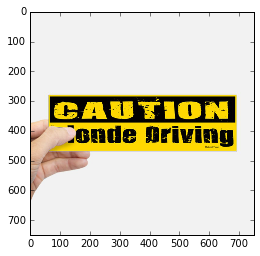

In [10]:
imshow(np.asarray(Image.open('blonde_driving.jpg', 'r')))

In [11]:
datos.head(3) #así quedan los datos transormados

,CASEID,age,hours-sleep-weekday,hours-sleep-weekend,month-of-birth,siblings,ROTTER_SCORE,SAMPWEIGHT,time-to-school-min,sleep-hours/week,...,light-physic-activ,sports,read-info-buying-food,eat fastfood,income>2.5k$/year2012,income>40k$/year2012,risk-averse-taking,poor2011,marital-stat,education
0,1,20,4,4,9,1,11,563563,4,5500,...,never,never,never,always,no,no,risk neutral,no,other,elementary school
1,2,20,4,3,1,8,8,763795,4,4700,...,3 or more times a week,< 1 a month,sometimes/rarely,never,no,no,risk neutral,no,married,high school
2,3,17,5,7,8,3,13,536272,5,5,...,1-3 times a month,1-3 times a month,always,never,no,no,risk taking,no,married,high school


In [12]:
datos.info() # veo que los datos categóricos han cambiado el formato de integer a object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12686 entries, 0 to 12685
Data columns (total 45 columns):
CASEID                    12686 non-null int64
age                       12686 non-null int64
hours-sleep-weekday       12686 non-null int64
hours-sleep-weekend       12686 non-null int64
month-of-birth            12686 non-null int64
siblings                  12686 non-null int64
ROTTER_SCORE              12686 non-null int64
SAMPWEIGHT                12686 non-null int64
time-to-school-min        12686 non-null int64
sleep-hours/week          12686 non-null int64
watch-tv-min/week         12686 non-null int64
reading-min/day           12686 non-null int64
AFQT-2                    12686 non-null int64
drugs-after-79            12686 non-null int64
ROSENBERG_ESTEEM_SCORE    12686 non-null int64
drinks/day                12686 non-null int64
income2012                12686 non-null int64
RISK_4                    12686 non-null int64
hourly-rate/job           12686 non-null int6

# IQ

#### Falta la variable de IQ. El coeficiente de IQ se ha obtenido a partir de los resultados del test AFQT-2 de las fuerzas armadas.

Los autores del estudio han tomado los resultados del test normalizados como determinante del IQ, escalandolos a media 100. Adicionalmente, dado que el test contiene un componente de conocimiento general y la edad de las personas incluidas en la encuesta puede diferir hasta 8 años se ha reslizado un ajuste en función de la edad, valorar las capacidades cognitivas y no perjudicar los respondentes más jovenes en base a la edad.

Una comprobación:

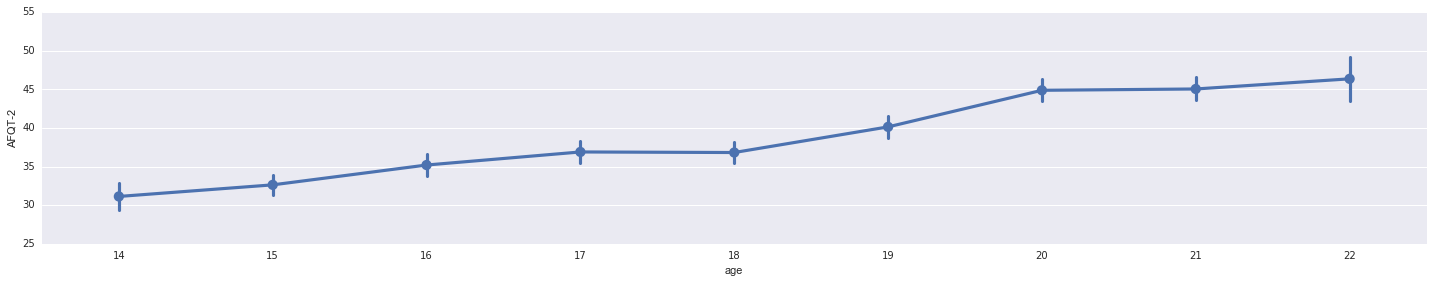

In [13]:
import seaborn as sns
%matplotlib inline

sns.factorplot('age','AFQT-2', data=datos,size=4,aspect=5)

Veo que efectivamente el resultado del test aumenta con la edad.

Desconociendo la metodología de cálculo de los coeficientes de ajuste, me los creo y realizo implementación descrita en el paper, es decir: resto los puntos correspondientes a cada edad de los resultado del test. Lo realizo en una variable nueva IQadj.

In [14]:
datos.loc[:, 'IQ'] = None
for row in datos.index:
    if   datos.loc[row, 'age'] > 19:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']-13.7
    elif   datos.loc[row, 'age'] == 19:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']-10.5
    elif   datos.loc[row, 'age'] == 18:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']-9.2
    elif   datos.loc[row, 'age'] == 17:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']-8
    elif   datos.loc[row, 'age'] == 16:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']-5.2
    elif   datos.loc[row, 'age'] == 15:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']-3
    else:
         datos.loc[row, 'IQ'] = datos.loc[row, 'AFQT-2']
            
datos[['IQ']] = datos[['IQ']].apply(pd.to_numeric)

Compruebo si el ajuste funciona y el coeficiente IQ no aumenta con la edad:

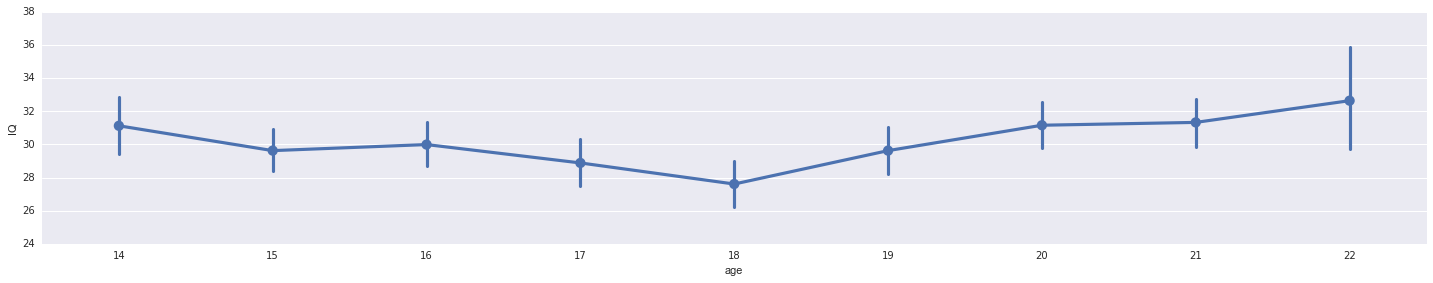

In [15]:
import seaborn as sns
%matplotlib inline

sns.factorplot('age','IQ', data=datos,size=4,aspect=5)

La relación ya no parece lineal y la diferencia en IQ puede ser provocada por otros factores. Me fío de los coeficientes. 

En el siguiente paso normalizo la variable de IQ y la escalo a media 100.

In [16]:
# Normalización
from sklearn import preprocessing
import numpy as np

x=datos[['IQ']]
X_scaled = preprocessing.scale(x)

print X_scaled.mean().round(), X_scaled.std().round()

0.0 1.0


In [17]:
# escalado a 100 opcion2
datos[['IQ']]=100+(X_scaled -X_scaled.mean())/(X_scaled .max()-X_scaled.min())
print datos[['IQ']].mean(), datos[['IQ']].std()

IQ    100.0
dtype: float64 IQ    0.258509
dtype: float64


In [18]:
datos.describe()

,CASEID,age,hours-sleep-weekday,hours-sleep-weekend,month-of-birth,siblings,ROTTER_SCORE,SAMPWEIGHT,time-to-school-min,sleep-hours/week,watch-tv-min/week,reading-min/day,AFQT-2,drugs-after-79,ROSENBERG_ESTEEM_SCORE,drinks/day,income2012,RISK_4,hourly-rate/job,IQ
count,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.00000,1.268600e+04,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000
mean,6343.500000,17.897998,5.171843,5.441353,6.494561,3.851963,8.59546,2.645397e+05,7.670030,5008.231830,1.104998,7.104682,38.595538,2.790478,15.690052,3.939146,121.093962,4.453019,7.845814,100.000000
std,3662.277092,2.306133,1.617196,1.950953,3.407233,2.641024,2.48597,2.144760e+05,8.311148,1468.124947,5.207588,12.180825,29.256329,1.672215,9.786113,1.493146,2155.834592,0.656762,92.004445,0.258509
min,1.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.00000,4.100000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,99.618022
25%,3172.250000,16.000000,4.000000,4.000000,4.000000,2.000000,7.00000,8.864200e+04,4.000000,4600.000000,0.000000,0.000000,12.000000,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,99.774692
50%,6343.500000,18.000000,4.000000,4.000000,7.000000,3.000000,9.00000,1.539700e+05,4.000000,5200.000000,0.000000,0.000000,33.000000,4.000000,19.000000,4.000000,4.000000,4.000000,4.000000,99.953743
75%,9514.750000,20.000000,6.000000,7.000000,9.000000,5.000000,10.00000,4.795630e+05,5.000000,5700.000000,0.000000,10.000000,63.000000,4.000000,25.000000,5.000000,5.000000,5.000000,5.000000,100.208890
max,12686.000000,22.000000,19.000000,24.000000,12.000000,29.000000,16.00000,1.058864e+06,55.000000,9800.000000,59.000000,55.000000,99.000000,5.000000,30.000000,24.000000,90000.000000,10.000000,5048.000000,100.618022


###  Análisis comparativo de IQ de las mujeres rubias

Dado que las personas hispanas y negras no son rubias por lo general, para el análisis comparativo escojo solamente las mujeres blancas, evitando de esta forma un bias por componentes raciales y sociales.

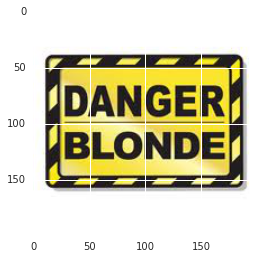

In [19]:
imshow(np.asarray(Image.open('warningblonde.jpg', 'r')))

In [20]:
white_women = datos[(datos.sex == 'female') & (datos.race == 'white')]
print 'sex', np.unique(white_women[['sex']])
print 'race',np.unique(white_women[['race']])

sex ['female']
race ['white']


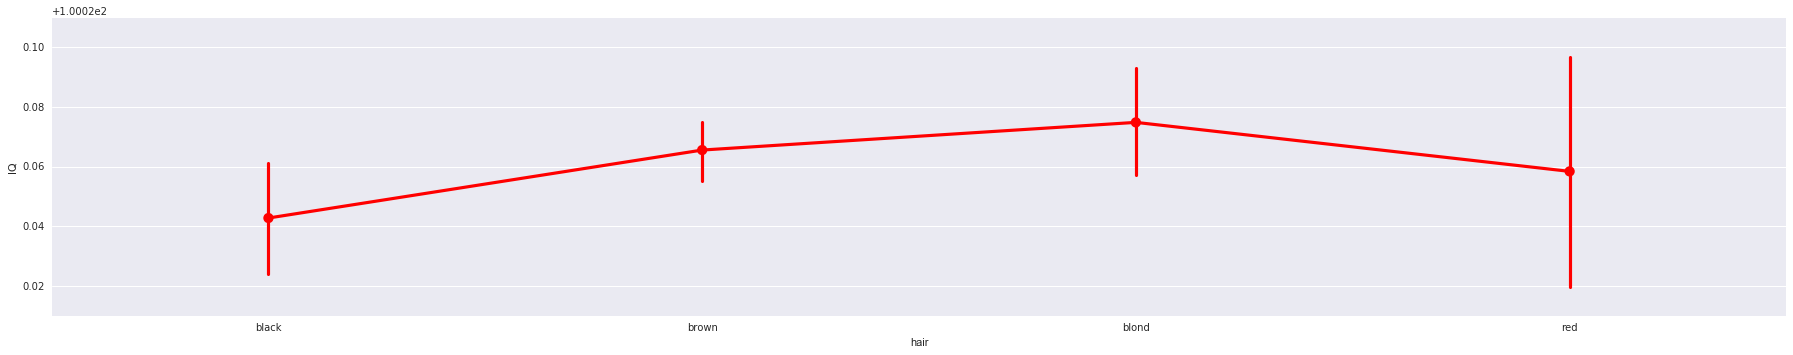

In [21]:
# voy a graficar el coeficiente IQ de las mujeres blancas desglosado por el color de pelo.
import seaborn as sns
%matplotlib inline

sns.factorplot('hair','IQ', data=white_women,size=5,aspect=5, color='red')

No parece que las mujeres de pelo rubio fueran menos inteligentes que las demás.

##### Entonces incluyo en la comparativa también hombres blancos para ver si en caso de los hombres IQ es menor en el caso de tener el pelo rubio.

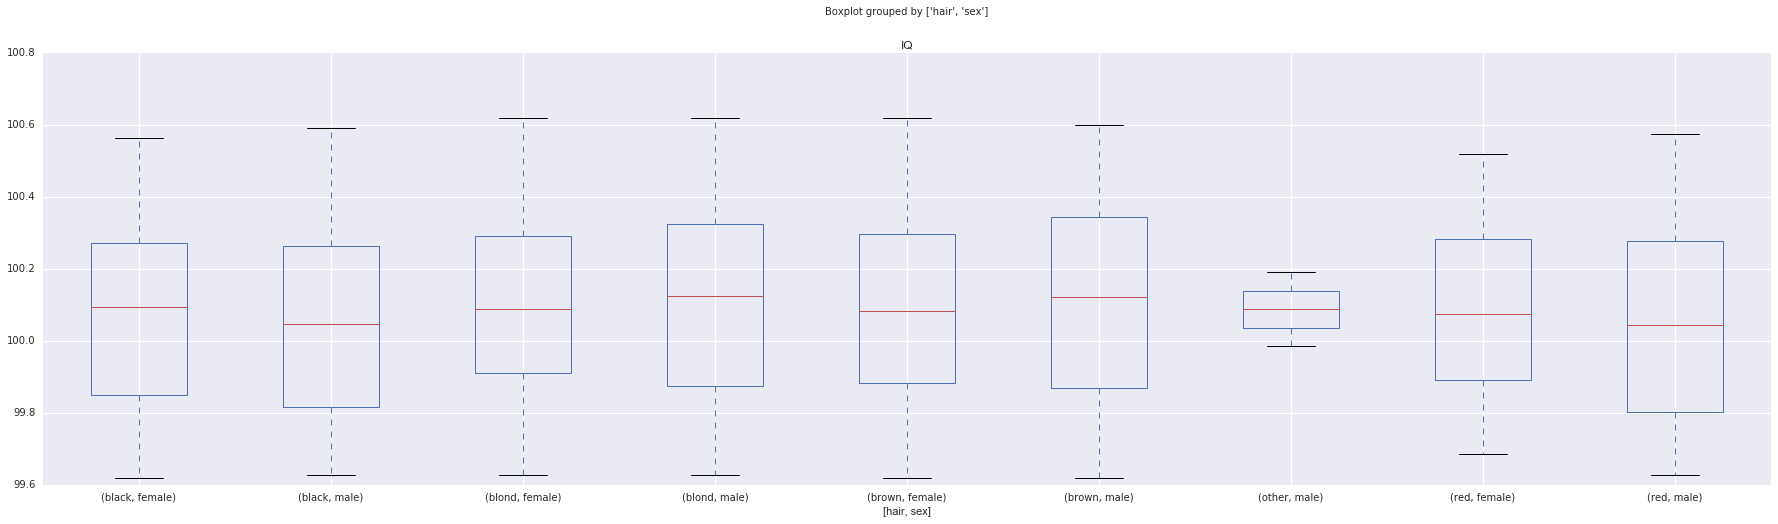

In [22]:
import matplotlib.pyplot as plt 
plt.figure();
graf = datos[datos.race == 'white'].boxplot(column=['IQ'], by=['hair', 'sex'],showfliers=False,figsize=(30,8))

Incluyendo comparativa con hombres puedo confirmar que el color rubio de pelo no perece perjudicar el coeficiente de inteligencia. Además en el caso de las mujeres rubias IQ extremamente bajo parece ser menos frecuente que en los demás casos.

##### Incluyendo el color de los ojos:

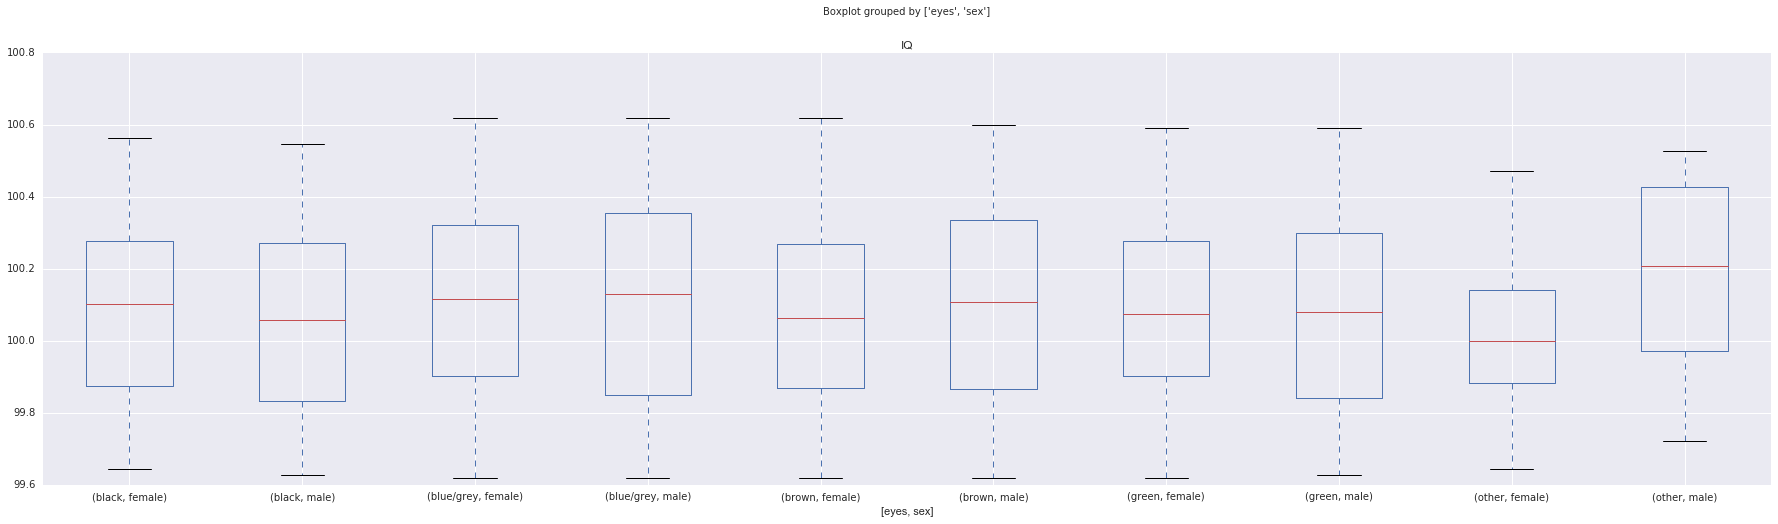

In [23]:
import matplotlib.pyplot as plt 
plt.figure();
graf = datos[datos.race == 'white'].boxplot(column=['IQ'], by=['eyes', 'sex'],showfliers=False,figsize=(30,8))

Tiene toda la pinta que color de los ojos no es un determinante de IQ. De esta forma concluyo que tanto el aspecto físico como el sexto no tiene que ver con el grado de inteligencia de una persona.

##### Si el coeficiente IQ tiene poca relación con el físico, con que se relaciona? Voy a investigar este punto.

Voy a comprobar si los factores de tipo social o familiar podrían influir en el coeficiente de inteligencia. Mayor incentivo a leer o estudiar en edad temprana podría ser un factor determinante?

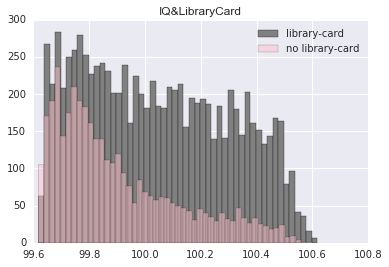

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(datos['IQ'][datos['library-card'] == 'yes'], bins=50, histtype='bar', color='grey', label='library-card') 
plt.hist(datos['IQ'][datos['library-card'] == 'no'], bins=50, histtype='bar', color='pink', label='no library-card', alpha=0.5)
plt.title('IQ&LibraryCard')
plt.legend()
plt.show()

Se puede ver claramente que las personas que en edad escolar estaban apuntadas a una biblioteca tieben IQ más alto.

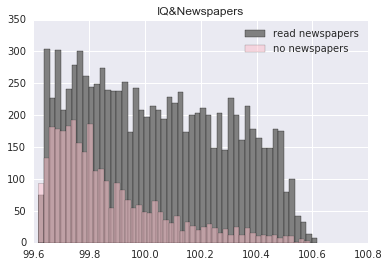

In [25]:
plt.hist(datos['IQ'][datos['read-newspapers'] == 'yes'], bins=50, histtype='bar', color='grey', label='read newspapers') 
plt.hist(datos['IQ'][datos['read-newspapers'] == 'no'], bins=50, histtype='bar', color='pink', label='no newspapers', alpha=0.5)
plt.title('IQ&Newspapers')
plt.legend()
plt.show()

El mismo perfil observamos entre las personas que tenían en casa acceso a periódicos, en comparación a las que no lo tenían.

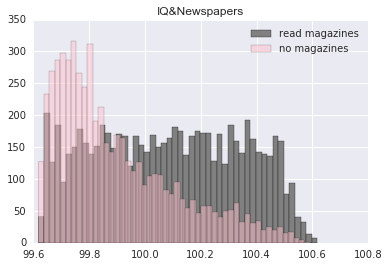

In [26]:
plt.hist(datos['IQ'][datos['read-magazines'] == 'yes'], bins=50, histtype='bar', color='grey', label='read magazines') 
plt.hist(datos['IQ'][datos['read-magazines'] == 'no'], bins=50, histtype='bar', color='pink', label='no magazines', alpha=0.5)
plt.title('IQ&Newspapers')
plt.legend()
plt.show()

Del mismo modo, la mayoría de las personas que no tenían en casa acceso a revistas tienen IQ medio bastante más bajo que las personas que lo tenían.  

Entonces el estudio implica mayor grado de inteligencia? Voy a investigar la relación entre el grado escolar obtenido y el coeficiente IQ.

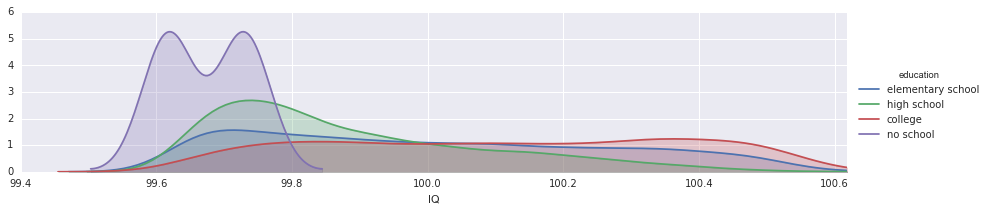

In [27]:
import seaborn as sns
%matplotlib inline
facet = sns.FacetGrid(datos, hue="education",aspect=4)
facet.map(sns.kdeplot,'IQ',shade= True)
facet.set(xlim=(99.4, datos['IQ'].max()))
facet.add_legend()

Vemos claramente que mayor grado escolar coincide con mayor IQ.

En los Estados Unidos el estudio tiene una relación con el poder adquisitivo. Voy a mirar si el hecho de ser pobre tiene que ver con IQ.

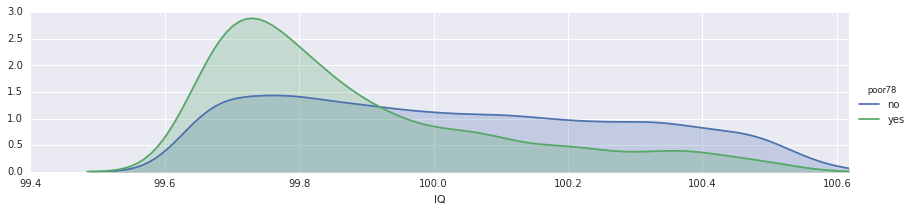

In [28]:
import seaborn as sns
%matplotlib inline
facet = sns.FacetGrid(datos, hue="poor78",aspect=4)
facet.map(sns.kdeplot,'IQ',shade= True)
facet.set(xlim=(99.4, datos['IQ'].max()))
facet.add_legend()

Observamos que las personas que han sido pobres al principio del estudio (en el año 78) tienden a tener coeficiente IQ más bajo en media.
Puede que sea  por falta de medios para desarollar las capacidades cognitivas.

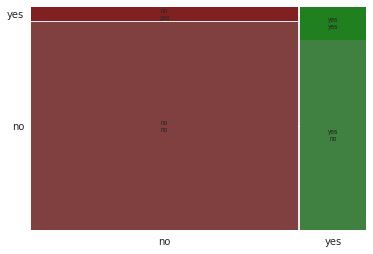

In [29]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 8.0
mosaic(datos, ['poor78','poor2011']);

Sin embargo los Estados Unidos parecen ser un país de oportunidades: la mayoría de las personas pobres en el año 78 han salido de la pobreza en el año 2011. También observamos que algunas de las persons que no eran pobres al principio han caído en pobreza, aunque han sido muy pocas.

Voy a comprobar si el hecho de salir de la pobreza tiene que ver con inteligencia.

In [30]:
get_rich = datos[(datos.poor78 == 'yes') & (datos.poor2011 == 'no')]
still_poor = datos[(datos.poor78 == 'yes') & (datos.poor2011 == 'yes')]
get_poor = datos[(datos.poor78 == 'no') & (datos.poor2011 == 'yes')]

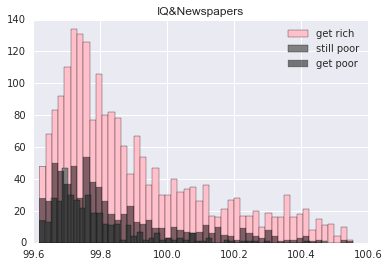

In [31]:
plt.hist(get_rich['IQ'], bins=50, histtype='bar', color='pink', label='get rich') 
plt.hist(still_poor['IQ'], bins=50, histtype='bar', color='grey', label='still poor') 
plt.hist(get_poor['IQ'], bins=50, histtype='bar', color='black', label='get poor', alpha=0.5)
plt.title('IQ&Newspapers')
plt.legend()
plt.show()

En todos los grupos que se ven el el gráfico prevalece coeficiente IQ por debajo de la media. Sin embargo parece que la cola derecha de distribución, donde IQ es alto, es mas gorda entre los las personas que salrieron de pobreza y muy fina entre las que cayeron de rico a pobre.

Entonces: ser rico tendrá que ver con IQ?

Voy a graficar los ingresos en funcción de IQ. En el segundo paso quito algunos outliers para que el resultado se aprecie mejor.

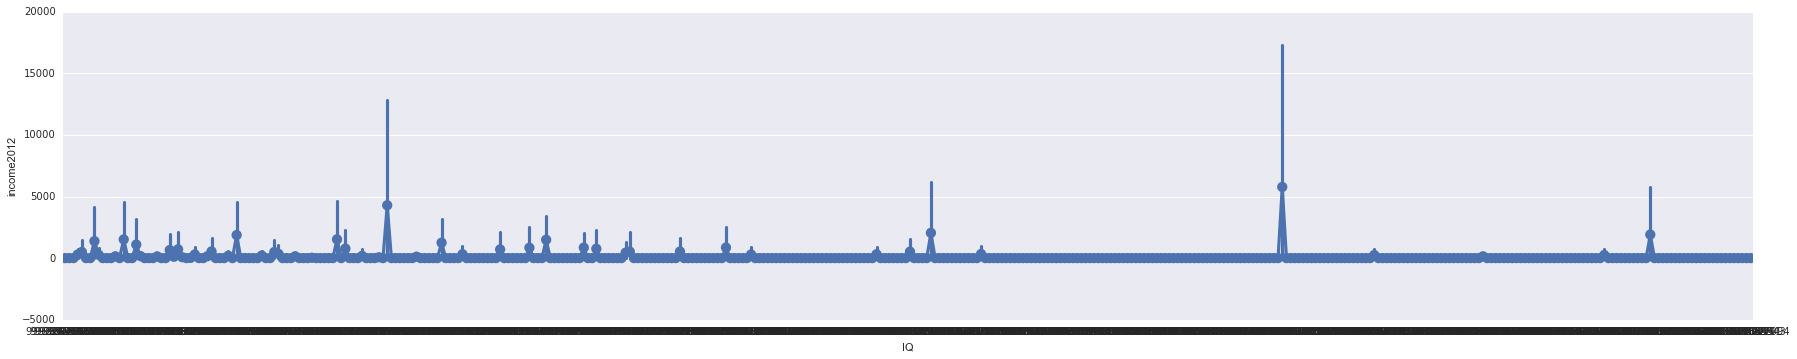

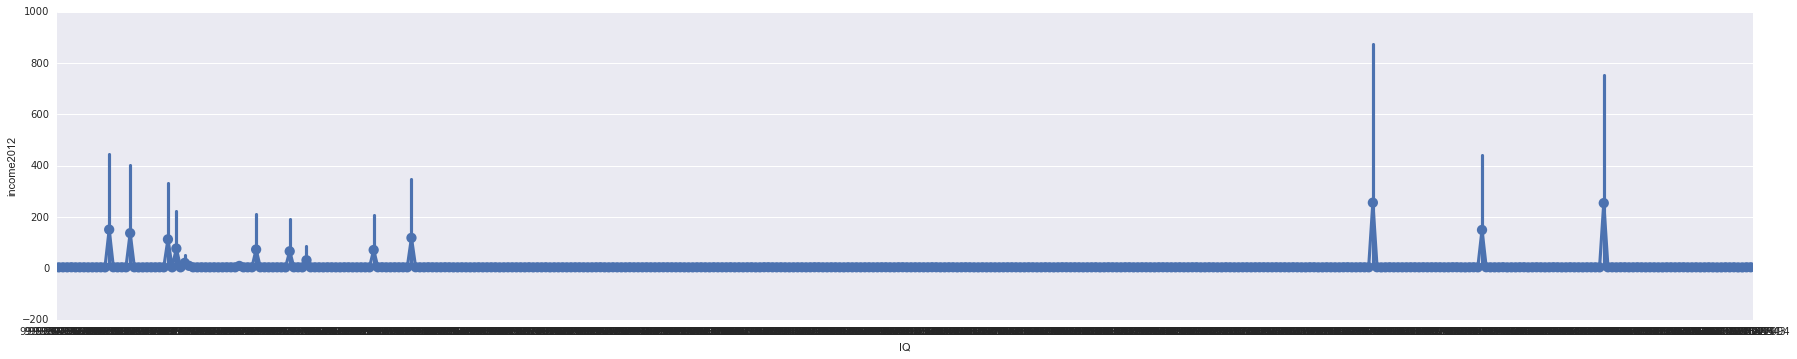

In [32]:
sns.factorplot('IQ','income2012', data=datos,size=5,aspect=5)

not_rich = datos[(datos.income2012 <10000)]                 
sns.factorplot('IQ','income2012', data=not_rich,size=5,aspect=5)  

 No parece que ser inteligente ayude a ser muy rico. Tal vez sirva para no ser pobre, pero de ahí hasta rico ... 

Sin embargo encuentro curiosa relación entre los ingresos y el aspecto físico:

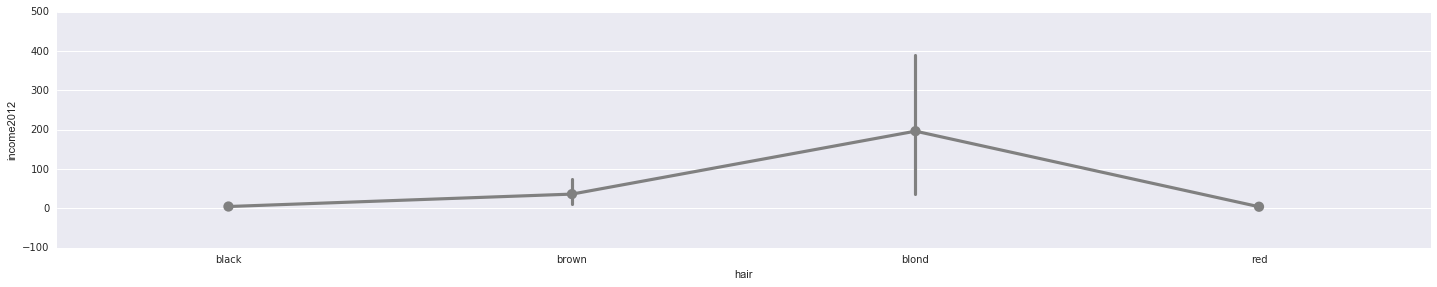

In [33]:
sns.factorplot('hair','income2012', data=white_women,size=4,aspect=5, color='grey')

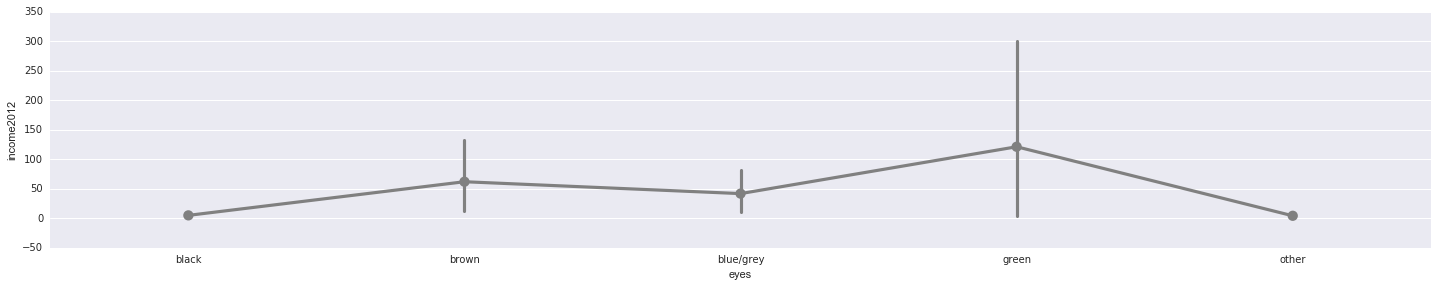

In [34]:
sns.factorplot('eyes','income2012', data=white_women,size=4,aspect=5, color='grey')

Las mujeres con pelo rubio y ojos claros parecen ganar más que otras mujeres. Si suponemos que las personas con este tipo de físico son consideradas como más guapas, se podría sacar conclusión que el físico puede ayudar a encontrar mejor puesto de trabajo.

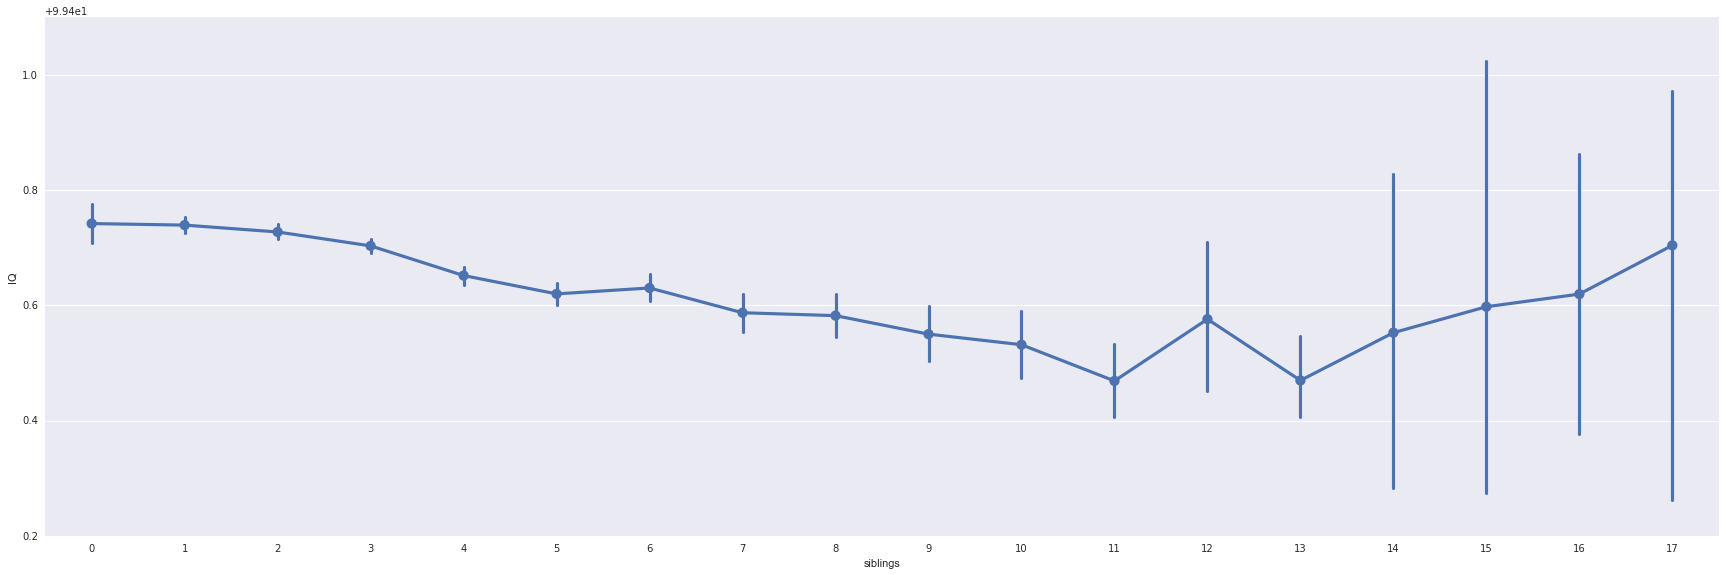

In [35]:
white = datos[(datos.race == 'white')]
sns.factorplot('siblings','IQ', data=white,size=8,aspect=3)

Vemos que el coeficiente IQ no difiere del número de hermanos, si son menos de 3 hermanos. Sin embargo a partir de 3 hermanos, con cada hermano adicional baja el coeficiente.

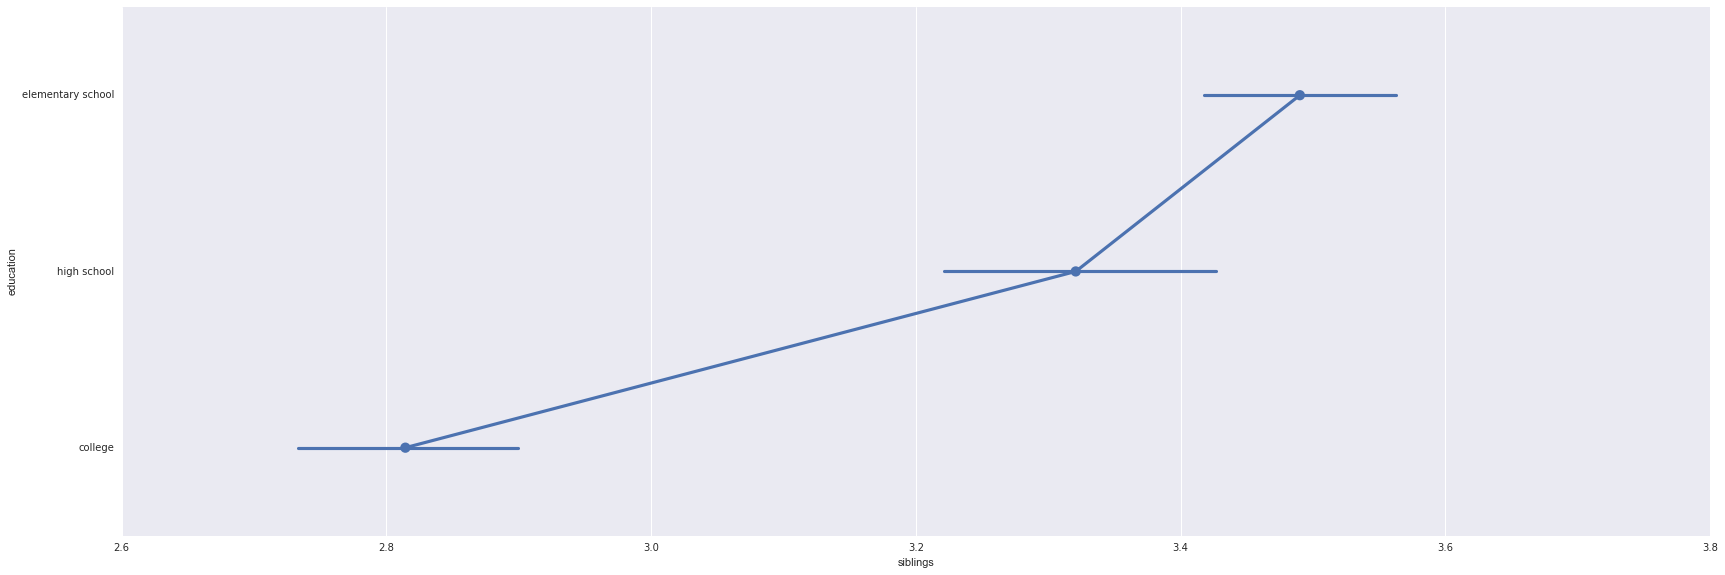

In [36]:
sns.factorplot('siblings','education', data=white,size=8,aspect=3)

También vemos que cuantos más hermanos, menor grado de formación en media.

Parece entonces que la atención de los padres tiene bastante que ver con el coeficiente IQ de los hijos. Esta tesis se confirma si miramos IQ de las personas que vivieron con sus padres biológicos hasta los 18 años y los que no vievieron con los padres hasta lso 18. 

Entre las personas que vivieron con sus padres hay más observaciones con el coeficiente IQ por encima de la media y entre los que no han vivido con los padres hay mas observaciones con el IQ por debajo de la media.

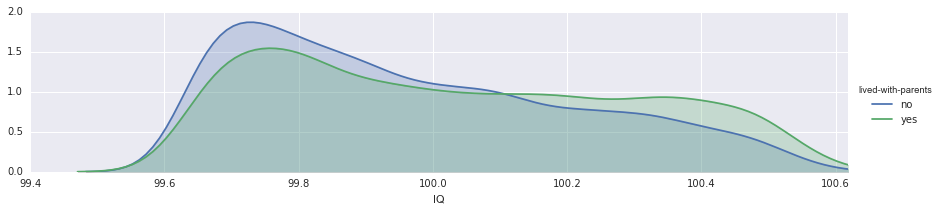

In [37]:
import seaborn as sns
%matplotlib inline
facet = sns.FacetGrid(datos, hue="lived-with-parents",aspect=4)
facet.map(sns.kdeplot,'IQ',shade= True)
facet.set(xlim=(99.4, datos['IQ'].max()))
facet.add_legend()

Una curiosidad: las gafas añaden aspecto de "listo". En realidad las personas con gafas son más listas que las personas sin gafas?

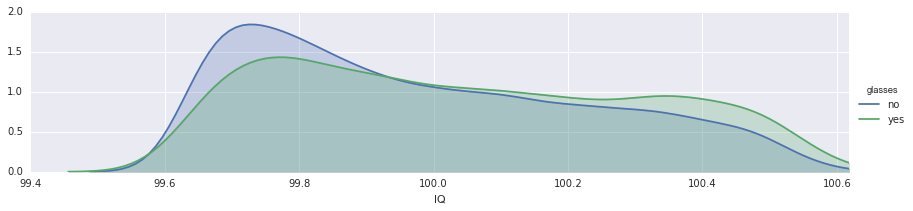

In [38]:
import seaborn as sns
%matplotlib inline
facet = sns.FacetGrid(datos, hue="glasses",aspect=4)
facet.map(sns.kdeplot,'IQ',shade= True)
facet.set(xlim=(99.4, datos['IQ'].max()))
facet.add_legend()

Parece que si :op
Al menos hay más personas muy listas con gafas que sin ellas.

Tenemos siguientes resultados del IQ relacionado con el uso de alcol.

C:\Anaconda2\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


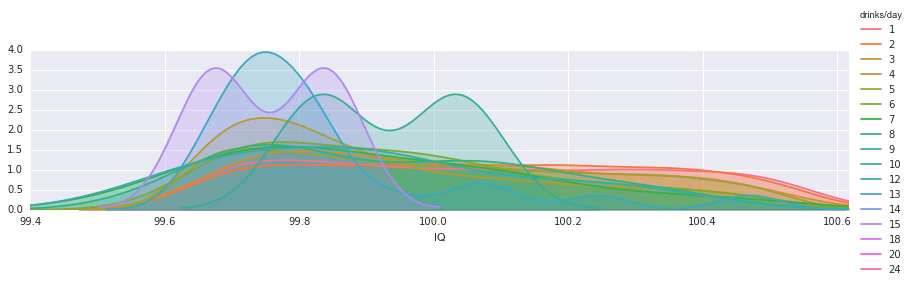

In [39]:
import seaborn as sns
%matplotlib inline
facet = sns.FacetGrid(datos, hue="drinks/day",aspect=4)
facet.map(sns.kdeplot,'IQ',shade= True)
facet.set(xlim=(99.4, datos['IQ'].max()))
facet.add_legend()

Definitivamente más de 3 copas diarias perjudican el IQ. Cuanto más alcol peor el coeficiente.

El modo de vida que llevan las personas parece tener relación con IQ.

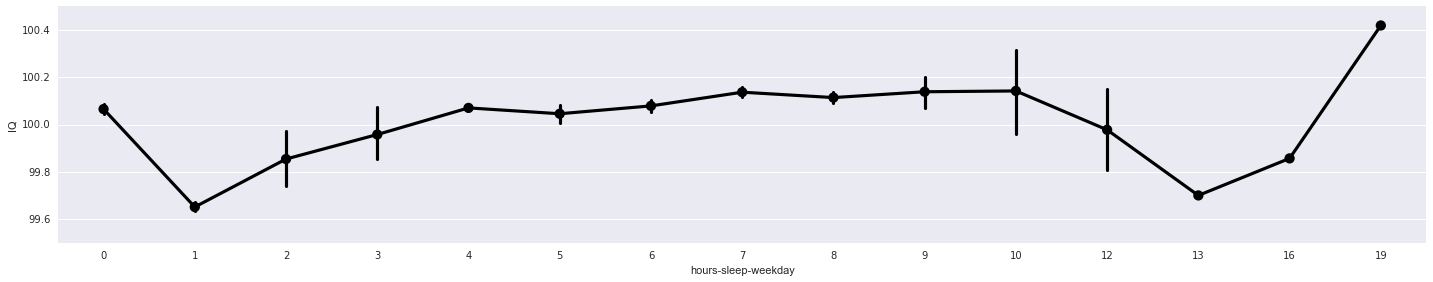

In [40]:
sns.factorplot('hours-sleep-weekday','IQ', data=white_women,size=4,aspect=5, color='black')

Cuantas más horas de sueño, mayor capacidad cognitiva.

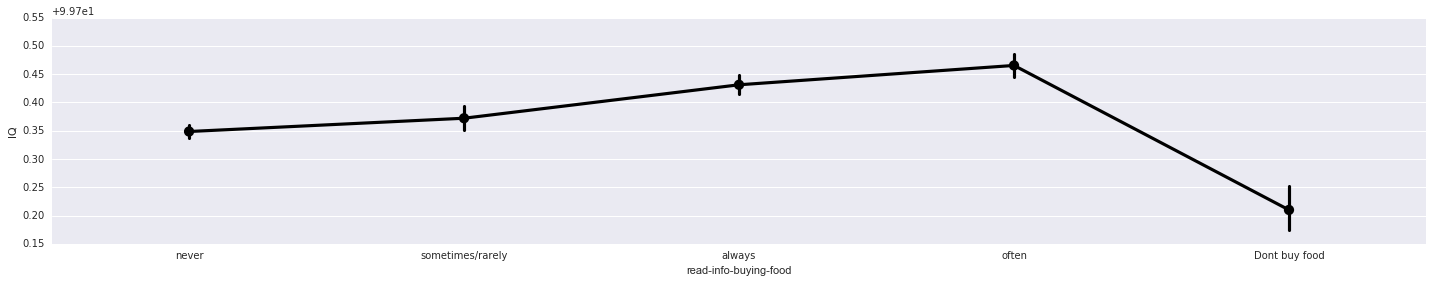

In [41]:
sns.factorplot('read-info-buying-food','IQ', data=white_women,size=4,aspect=5, color='black')

Las personas que se alimentan mejor (leen los ingredientes en las etiquetas de comida) también parecen tener IQ mas alto.

La escala de Rosenberg mide la autoestima de las personas. Podemos observar que cuanto mayor autoestima mayores tambien las capacidades cognitivas. La relación se distorsiona unicamente en los casos de autoestima extremamente baja.

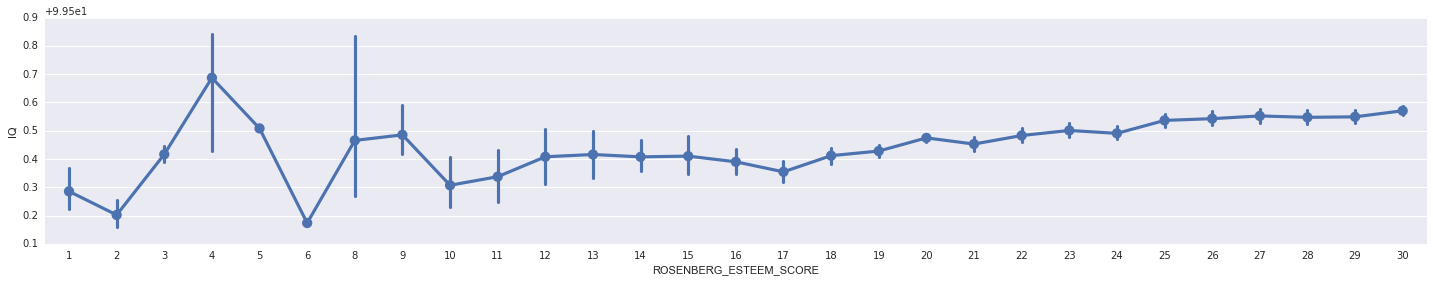

In [42]:
import seaborn as sns # autoestima, cuanto mas mayor autoestima
%matplotlib inline

sns.factorplot('ROSENBERG_ESTEEM_SCORE','IQ', data=datos,size=4,aspect=5)

En la escala de Rotter ha sido diseñada para medir la convicción de los indivíduos del control sobre la propia vida frente al control del entorno en el que se encuentran (creencia en el destino/ la suerte).

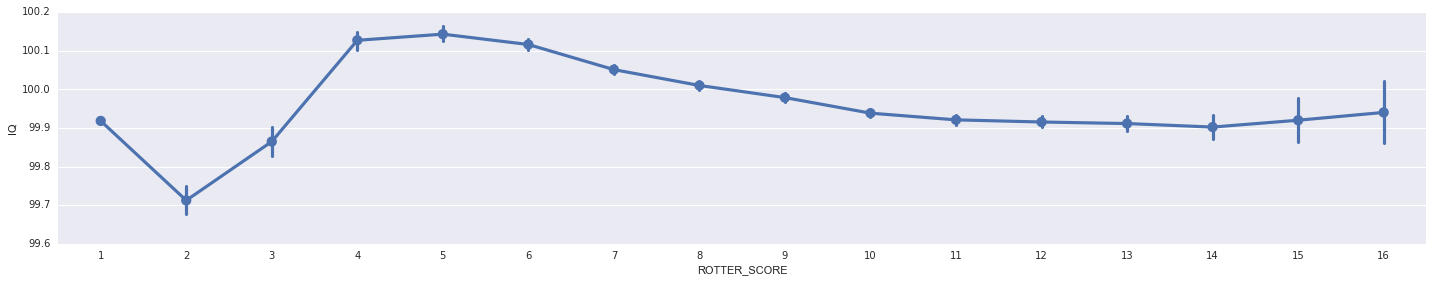

In [43]:
import seaborn as sns 
%matplotlib inline

sns.factorplot('ROTTER_SCORE','IQ', data=datos,size=4,aspect=5)

Podemos ver que las personas con puntuación mediana muestran mayor IQ. Sin embargo tanto las personas convencidad de tener total control sobre su propia vida como las que se someten totalente a la suerte muestran IQ menor.

# Conlusiones

La capacidad cognitiva no es cuestión totalmente genética. No tiene de hecho nada que ver con otras características genéticas, como por ejemplo el sexo, color del pelo o color de los ojos.
Es algo que se puede estimular en la primera etapa de la vida de una persona (por ejemplo vía atención de los padres o acceso a las actividades cognitivas).
La capacidad cognitiva también es algo que puede reducirse o aumentar dependiendo de los hábitos de una persona: cansancio, alcol y estados de ánimo extremos perjudican el IQ.

El grado de la inteligencia no es un factor principal determinante para conseguir el éxito en la vida, dado por ejemplo por un trabajo mejor. Eso sí, ciertas capacidades cognitivas ayudan a no fracasar.